In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

In [3]:
seaborn.set()

In [58]:
ecoli_comb = pandas.read_excel('../datasets/datasets_new/ecoli_new/ecoli_comb_og.xlsx')

In [59]:
ecoli_comb

,Entry,Status,Protein names,Gene names,Organism,Length,Mass,Gene names (ordered locus ),Entry name,Ribosomal,ecoli2,ecoli3,ecoli4,ecoli5,ecoli6,ecoli7,ecoli8,ecoli9
0,A0A4S5AYA5,unreviewed,Zn(II)/Cd(II)/Pb(II) translocating P-type ATPa...,zntA FAZ83_10695,Escherichia coli (strain K12),732,76718.0,NaN,A0A4S5AYA5_ECOLI,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0A6D2Y886,unreviewed,Zn-dependent oxidoreductase,FAZ83_03425,Escherichia coli (strain K12),339,36534.0,NaN,A0A6D2Y886_ECOLI,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0A4S5ATF1,unreviewed,Zn(2+)-responsive transcriptional regulator,zntR FAZ83_23180,Escherichia coli (strain K12),141,16195.0,NaN,A0A4S5ATF1_ECOLI,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P37617,reviewed,Zinc/cadmium/lead-transporting P-type ATPase (...,zntA yhhO b3469 JW3434,Escherichia coli (strain K12),732,76840.0,b3469 JW3434,ZNTA_ECOLI,False,40.426732,549.064575,139.518791,11.577466,15.682215,14.692005,0.000009,0.000010
4,P33030,reviewed,Zinc-binding GTPase YeiR (EC 3.6.-.-),yeiR b2173 JW2161,Escherichia coli (strain K12),328,36113.0,b2173 JW2161,YEIR_ECOLI,False,8.999467,NaN,167.211207,54.515815,96.054656,160.269489,0.000039,0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,P76078,reviewed,"1,2-phenylacetyl-CoA epoxidase, subunit B (1,2...",paaB ynbF b1389 JW1384,Escherichia coli (strain K12),95,10942.0,b1389 JW1384,PAAB_ECOLI,False,NaN,NaN,NaN,0.024633,0.011180,0.294185,0.000000,0.000000
9477,P76077,reviewed,"1,2-phenylacetyl-CoA epoxidase, subunit A (EC ...",paaA ydbO b1388 JW1383,Escherichia coli (strain K12),309,35499.0,b1388 JW1383,PAAA_ECOLI,False,NaN,NaN,NaN,NaN,0.005077,0.015905,0.000000,0.000000
9478,P77467,reviewed,"1,2-epoxyphenylacetyl-CoA isomerase (EC 5.3.3.18)",paaG ydbT b1394 JW1389,Escherichia coli (strain K12),262,28405.0,b1394 JW1389,PAAG_ECOLI,False,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
9479,A0A6D2XEG8,unreviewed,10 kDa chaperonin (GroES protein) (Protein Cpn10),groES groS FAZ83_09765,Escherichia coli (strain K12),97,10387.0,NaN,A0A6D2XEG8_ECOLI,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#Calculating protein copies per um3 from protein mass fractions as detailed in Mori et al. 2021 (Supplementary Note 1)
def mori_calculate(mass_fractions, mws):
    avogadro = 6.022 * 10**23 #[mol-1]
    protein_density = 13.5 * 10**(-8) #[g/um3] 
    return (mass_fractions * protein_density / 1000000 / mws) * avogadro

for i in ['ecoli8', 'ecoli9']:
    ecoli_comb.loc[:, i] = mori_calculate(ecoli_comb[i], ecoli_comb['Mass'])

In [61]:
ecoli_comb.fillna(0, inplace = True)

In [62]:
#Unique proteins quantified in datasets, after processing (values before processing?)
total_quant_proteins = []
for i in range(2,10):
    total_quant_proteins.append(len(ecoli_comb[ecoli_comb[f'ecoli{i}'] != 0]))
    
total_quant_proteins

[2258, 1217, 1913, 2349, 2015, 2015, 2075, 2048]

In [63]:
ecoli_comb.loc[:, 'ecoli2':] = ecoli_comb.loc[:, 'ecoli2':].astype(float) #Make sure everything's in float

In [64]:
for i in ['ecoli2', 'ecoli4', 'ecoli5','ecoli6', 'ecoli7']: #Calculate copies per fl instead of per cell
    ecoli_comb.loc[:, i] /= 2.15 #Cell volume from Basan et al. 2015a

In [6]:
cn_per_vol = []
for i in range(1,5):
    cn_per_vol.append(sum(ecoli_comb[f'ecoli{i}']))
    
cn_per_vol

[3933465.5056633493, 4876077.751756361, 2204424.924984279, 3129049.1451515593]

In [19]:
ecoli_comb_core = ecoli_comb.loc[~(ecoli_comb.iloc[:,-4:]==0.0).any(axis=1)]

In [20]:
ecoli_comb_core

,Entry,Status,Protein names,Gene names,Organism,Length,Mass,Gene names (ordered locus ),Entry name,Ribosomal,ecoli1,ecoli2,ecoli3,ecoli4
3,P37617,reviewed,Zinc/cadmium/lead-transporting P-type ATPase (...,zntA yhhO b3469 JW3434,Escherichia coli (strain K12),732,76840,b3469 JW3434,ZNTA_ECOLI,False,549.064575,60.660344,5.033681,9.903560
110,P0A9M5,reviewed,Xanthine-guanine phosphoribosyltransferase (XG...,gpt gpp gxu b0238 JW0228,Escherichia coli (strain K12),152,16971,b0238 JW0228,XGPT_ECOLI,False,1389.956259,4068.936926,1470.735981,1156.909020
119,P21165,reviewed,Xaa-Pro dipeptidase (X-Pro dipeptidase) (EC 3....,pepQ b3847 JW3823,Escherichia coli (strain K12),443,50176,b3847 JW3823,PEPQ_ECOLI,False,773.394786,3604.617918,538.563713,712.303502
121,P15034,reviewed,Xaa-Pro aminopeptidase (EC 3.4.11.9) (Aminoacy...,pepP b2908 JW2876,Escherichia coli (strain K12),441,49815,b2908 JW2876,AMPP_ECOLI,False,247.357469,1906.393527,268.136837,517.771415
137,P06129,reviewed,Vitamin B12 transporter BtuB (Cobalamin recept...,btuB bfe cer dcrC b3966 JW3938,Escherichia coli (strain K12),614,68407,b3966 JW3938,BTUB_ECOLI,False,235.873595,626.591467,294.000195,327.593464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,P10371,reviewed,1-(5-phosphoribosyl)-5-[(5-phosphoribosylamino...,hisA b2024 JW2006,Escherichia coli (strain K12),245,26033,b2024 JW2006,HIS4_ECOLI,False,283.589617,1745.021002,922.006949,440.996730
9467,P0ABU0,reviewed,"1,4-dihydroxy-2-naphthoyl-CoA synthase (DHNA-C...",menB b2262 JW2257,Escherichia coli (strain K12),285,31633,b2262 JW2257,MENB_ECOLI,False,389.235000,994.001703,242.526704,722.468238
9469,P77781,reviewed,"1,4-dihydroxy-2-naphthoyl-CoA hydrolase (DHNA-...",menI ydiI b1686 JW1676,Escherichia coli (strain K12),136,14945,b1686 JW1676,MENI_ECOLI,False,84.411881,226.783577,136.146261,438.385234
9473,P07762,reviewed,"1,4-alpha-glucan branching enzyme GlgB (EC 2.4...",glgB b3432 JW3395,Escherichia coli (strain K12),728,84337,b3432 JW3395,GLGB_ECOLI,False,14.544909,620.007734,32.981904,260.703635


In [27]:
cn_per_vol = []
for i in range(1,5):
    cn_per_vol.append(sum(ecoli_comb[f'ecoli{i}']))
    
cn_per_vol

[3933465.5056633493, 4876077.751756361, 2204424.924984279, 3129049.1451515593]

In [8]:
cn_per_vol

[3933465.5056633493, 4876077.751756361, 2204424.924984279, 3129049.1451515593]

In [22]:
cn_per_vol2 = [[x] for x in cn_per_vol2]

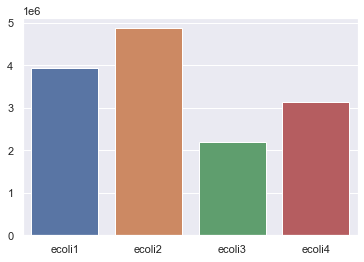

In [23]:
seaborn.barplot(data=cn_per_vol)
plt.xticks(range(0,4), [f'ecoli{i}' for i in range(1,5)])
plt.savefig('../graphs/ecoli_cn_sum_core.png', dpi=300)

In [34]:
cn_mass_sum = []
for i in range(1,5):
    cn_mass_sum.append(sum(ecoli_comb[f'ecoli{i}']*ecoli_comb['Mass']))

In [35]:
cn_mass_sum

[111330898150.06967, 159774567907.75565, 63774123862.156944, 81285996498.30988]

In [37]:
cn_mass_sum = [[x] for x in cn_mass_sum]

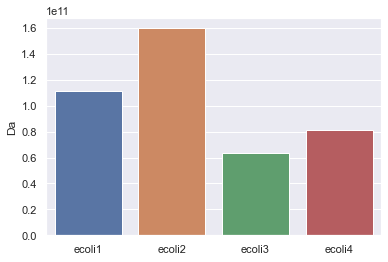

In [39]:
seaborn.barplot(data=cn_mass_sum)
plt.xticks(range(0,4), [f'ecoli{i}' for i in range(1,5)])
plt.ylabel('Da')
plt.savefig('../graphs/ecoli_cn_sum_mass.png', dpi=300)

In [68]:
ecoli_comb2 = ecoli_comb[ecoli_comb.columns[:10].tolist() + ['ecoli3', 'ecoli4', 'ecoli5', 'ecoli8']]

In [72]:
ecoli_comb2.to_excel('../datasets/datasets_new/ecoli_new/ecoli_comb_copiespercell.xlsx', index=False)

In [81]:
ecoli_comb3 = ecoli_comb2.copy()

In [82]:
import numpy

In [83]:
ecoli_comb3.loc[:, ['ecoli3', 'ecoli4', 'ecoli5', 'ecoli8']] = ecoli_comb3.loc[:, ['ecoli3', 'ecoli4', 'ecoli5', 'ecoli8']].apply(numpy.log10)

In [86]:
ecoli_comb3 = ecoli_comb3.fillna(0)

In [92]:
ecoli_comb3.replace(numpy.inf, 0, inplace = True)

In [91]:
ecoli_comb3

,Entry,Status,Protein names,Gene names,Organism,Length,Mass,Gene names (ordered locus ),Entry name,Ribosomal,ecoli3,ecoli4,ecoli5,ecoli8
0,A0A4S5AYA5,unreviewed,Zn(II)/Cd(II)/Pb(II) translocating P-type ATPa...,zntA FAZ83_10695,Escherichia coli (strain K12),732,76718.0,0,A0A4S5AYA5_ECOLI,False,-inf,-inf,-inf,-inf
1,A0A6D2Y886,unreviewed,Zn-dependent oxidoreductase,FAZ83_03425,Escherichia coli (strain K12),339,36534.0,0,A0A6D2Y886_ECOLI,False,-inf,-inf,-inf,-inf
2,A0A4S5ATF1,unreviewed,Zn(2+)-responsive transcriptional regulator,zntR FAZ83_23180,Escherichia coli (strain K12),141,16195.0,0,A0A4S5ATF1_ECOLI,False,-inf,-inf,-inf,-inf
3,P37617,reviewed,Zinc/cadmium/lead-transporting P-type ATPase (...,zntA yhhO b3469 JW3434,Escherichia coli (strain K12),732,76840.0,b3469 JW3434,ZNTA_ECOLI,False,2.739623,1.812194,0.731175,0.995791
4,P33030,reviewed,Zinc-binding GTPase YeiR (EC 3.6.-.-),yeiR b2173 JW2161,Escherichia coli (strain K12),328,36113.0,b2173 JW2161,YEIR_ECOLI,False,-inf,1.890827,1.404084,1.941523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,P76078,reviewed,"1,2-phenylacetyl-CoA epoxidase, subunit B (1,2...",paaB ynbF b1389 JW1384,Escherichia coli (strain K12),95,10942.0,b1389 JW1384,PAAB_ECOLI,False,-inf,-inf,-1.940914,-inf
9477,P76077,reviewed,"1,2-phenylacetyl-CoA epoxidase, subunit A (EC ...",paaA ydbO b1388 JW1383,Escherichia coli (strain K12),309,35499.0,b1388 JW1383,PAAA_ECOLI,False,-inf,-inf,-inf,-inf
9478,P77467,reviewed,"1,2-epoxyphenylacetyl-CoA isomerase (EC 5.3.3.18)",paaG ydbT b1394 JW1389,Escherichia coli (strain K12),262,28405.0,b1394 JW1389,PAAG_ECOLI,False,-inf,-inf,-inf,-inf
9479,A0A6D2XEG8,unreviewed,10 kDa chaperonin (GroES protein) (Protein Cpn10),groES groS FAZ83_09765,Escherichia coli (strain K12),97,10387.0,0,A0A6D2XEG8_ECOLI,False,-inf,-inf,-inf,-inf


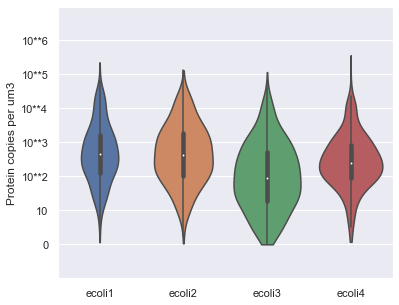

In [117]:
plt.figure(figsize=(6,5))
plt.ylim([-1,7])
plt.yticks(range(-1,8), ['','0', '10', '10**2', '10**3', '10**4', '10**5', '10**6', ''])
seaborn.violinplot(data=[ecoli_comb3[ecoli_comb3[f'ecoli{i}'] > 0.0][f'ecoli{i}'] for i in [3,4,5,8]], cut=0, scale='count', bw=0.3)
plt.xticks(range(0,4), [f'ecoli{i}' for i in range(1,5)])
plt.ylabel('Protein copies per um3')
plt.savefig('../graphs/ecoli_cn_dist.png', dpi=300)

In [122]:
for i in [3,4,5,8]:
    arr = ecoli_comb2[ecoli_comb2[f'ecoli{i}'] > 0.0][f'ecoli{i}']
    print(arr.min())
    print(arr.max())
    print(arr.mean())
    print(arr.median())
    print(numpy.percentile(arr, 25))
    print(numpy.percentile(arr, 75))
    print(numpy.percentile(arr, 75)-numpy.percentile(arr, 25))
    print("...")

1.156411623588531
227453.47106885
3232.099840314997
442.7669991786805
129.0521904623926
1678.753905611024
1549.7017151486314
...
1.0719644785991624
132652.81740275136
2726.7481561992336
431.7347578158454
104.02960252467103
1828.2578141810823
1724.2282116564113
...
0.0019109485035264007
117419.56112740214
1003.9259313639341
70.67270963706461
12.215804400000001
436.72763101321857
424.51182661321855
...
0.06401450752688172
369360.6072485883
1507.9754916393078
250.15297219204953
87.25354918197901
813.1130521154801
725.8595029335011
...


In [124]:
ecoli_comb4 = ecoli_comb2.copy()
ecoli_comb4.loc[:, ['ecoli3', 'ecoli4', 'ecoli5', 'ecoli8']] = ecoli_comb4.loc[:, ['ecoli3', 'ecoli4', 'ecoli5', 'ecoli8']].apply(numpy.log)

In [161]:
import itertools
from scipy.stats import pearsonr

In [126]:
ecoli_comb4 = ecoli_comb4.rename(columns={'ecoli3':'ecoli1','ecoli4':'ecoli2','ecoli5':'ecoli3','ecoli8':'ecoli4'})

In [136]:
plt.style.use('seaborn')

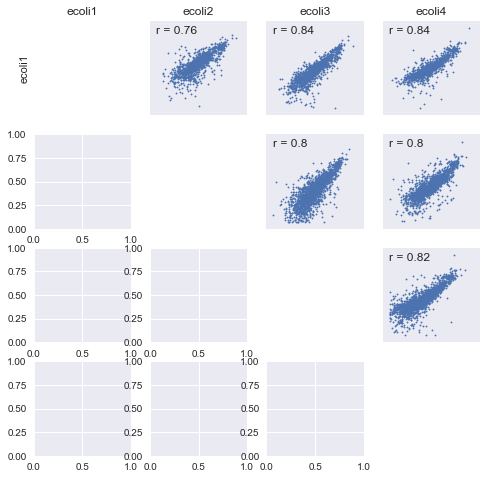

In [181]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
for i in range(0, 2):
    for j in range(0, 2):
        if i <= j: 
            if i == 0:
                axs[i,j].set_title('ecoli1')
                axs[i,j].set_ylabel('ecoli1')
            axs[i][j].set(xlim=[-1,14], ylim=[-1,14])
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            axs[i][j].set_facecolor('w')
        arr1 = ecoli_comb4[(ecoli_comb4[f'ecoli{i+1}'] > 0.0) & (ecoli_comb4[f'ecoli{j+1}'] > 0.0)][f'ecoli{i+1}'].values
        arr2 = ecoli_comb4[(ecoli_comb4[f'ecoli{i+1}'] > 0.0) & (ecoli_comb4[f'ecoli{j+1}'] > 0.0)][f'ecoli{j+1}'].values
        if i < j:
            axs[i][j].set(xlim=[-1,14], ylim=[-1,14])
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            axs[i][j].scatter(arr1, arr2, s=2)
            if i == 0:
                axs[i][j].set_title(f'ecoli{j+1}')
            axs[i][j].text(0,12,f'r = {str(round(pearsonr(arr1, arr2)[0],2))}')
        if i > j:
            #axs[i][j].imshow(pearsonr(arr1, arr2)[0])
            pass

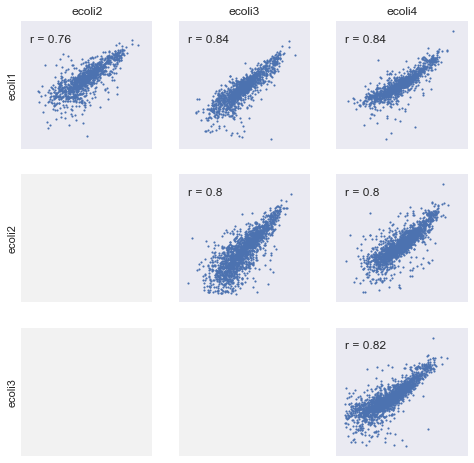

In [194]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i in range(0, 3):
    for j in range(0, 3):
        if i > j:
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            axs[i][j].set_facecolor('0.95')
        
        if i <= j:
            arr1 = ecoli_comb4[(ecoli_comb4[f'ecoli{i+1}'] > 0.0) & (ecoli_comb4[f'ecoli{j+2}'] > 0.0)][f'ecoli{i+1}'].values
            arr2 = ecoli_comb4[(ecoli_comb4[f'ecoli{i+1}'] > 0.0) & (ecoli_comb4[f'ecoli{j+2}'] > 0.0)][f'ecoli{j+2}'].values
            axs[i][j].set(xlim=[-1,14], ylim=[-1,14])
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            axs[i][j].scatter(arr1, arr2, s=3)
            axs[i][j].text(0,11.5,f'r = {str(round(pearsonr(arr1, arr2)[0],2))}')
        if i == 0:
            axs[i][j].set_title(f'ecoli{j+2}')
        if j == 0:
            axs[i][j].set_ylabel(f'ecoli{i+1}')
            
plt.savefig('../graphs/ecoli_cn_pearson.png', bbox_inches='tight', dpi=300)

In [174]:
x = ecoli_comb4[(ecoli_comb4[f'ecoli{1}'] > 0.0) & (ecoli_comb4[f'ecoli{2}'] > 0.0)][f'ecoli{1}'].values

In [175]:
y = ecoli_comb4[(ecoli_comb4[f'ecoli{1}'] > 0.0) & (ecoli_comb4[f'ecoli{2}'] > 0.0)][f'ecoli{2}'].values

In [176]:
pearsonr(x,y)

(0.7608805799717062, 2.0735723976859694e-212)

In [53]:
ecoli_comb2.set_index('Entry', inplace = True)

In [54]:
sets = [ecoli_comb2[ecoli_comb2[f'ecoli{i}'] != 0.0].index.tolist() for i in [3,4,5,8]]

In [55]:
for i in [1,2,3,4]:
    with open(f'ecoli{i}.txt', 'w+') as f:
        f.write('\n'.join(sets[i-1]))

In [1]:
#sets[0]

In [39]:
[len(i) for i in sets]

[9481, 9481, 9481, 9481]

In [200]:
ecoli_comb_r = ecoli_comb2[ecoli_comb2['Ribosomal']]

In [201]:
ecoli_comb_r.head()

,Entry,Status,Protein names,Gene names,Organism,Length,Mass,Gene names (ordered locus ),Entry name,Ribosomal,ecoli3,ecoli4,ecoli5,ecoli8
2683,A0A4S5B0X8,unreviewed,Ribosomal protein S6--L-glutamate ligase (EC 6...,rimK FAZ83_15215,Escherichia coli (strain K12),300,32436.0,0,A0A4S5B0X8_ECOLI,True,0.000000,0.000000,0.000000,0.000000
2688,A0A6D2XN54,unreviewed,Ribosomal protein S12 methylthiotransferase Ri...,rimO FAZ83_15300,Escherichia coli (strain K12),441,49582.0,0,A0A6D2XN54_ECOLI,True,0.000000,0.000000,0.000000,0.000000
2691,A0A4S4PR81,unreviewed,Ribosomal protein L11 methyltransferase (L11 M...,prmA FAZ83_05080,Escherichia coli (strain K12),293,31877.0,0,A0A4S4PR81_ECOLI,True,0.000000,0.000000,0.000000,0.000000
9111,P0A7R1,reviewed,50S ribosomal protein L9 (Large ribosomal subu...,rplI b4203 JW4161,Escherichia coli (strain K12),149,15769.0,b4203 JW4161,RL9_ECOLI,True,38746.219426,29163.858714,16227.336061,10793.592363
9112,A0A6D2XEU4,unreviewed,50S ribosomal protein L9,rplI FAZ83_21625,Escherichia coli (strain K12),149,15769.0,0,A0A6D2XEU4_ECOLI,True,0.000000,0.000000,0.000000,0.000000


In [202]:
ribo_max_id = []
for i in [3,4,5,8]:
    ribo_max_id.append(ecoli_comb_r.set_index('Entry')[f'ecoli{i}'].idxmax())

In [203]:
ribo_max_id

['P0A7K2', 'P0A7M6', 'P0A7T3', 'P0A7K2']

In [128]:
seaborn.color_palette("deep")

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [126]:
ecoli_comb_r[ecoli_comb_r['Entry'] == 'P0A7T3']

,Entry,Status,Protein names,Gene names,Organism,Length,Mass,Gene names (ordered locus ),Entry name,Ribosomal,ecoli2,ecoli3,ecoli4,ecoli5,ecoli6,ecoli7,ecoli8,ecoli9
9332,P0A7T3,reviewed,30S ribosomal protein S16 (Small ribosomal sub...,rpsP b2609 JW2590,Escherichia coli (strain K12),82,9191.0,b2609 JW2590,RS16_ECOLI,True,3236.88698,28123.951099,30133.607338,28296.391818,31286.760417,41907.93405,14887.865094,17541.205403


In [204]:
p0a7k2 = ecoli_comb_r.set_index('Entry').loc['P0A7K2'].loc['ecoli3':]

In [122]:
p0a7t3 = ecoli_comb_r.set_index('Entry').loc['P0A7T3'].loc['ecoli2':]

In [123]:
p0a7m6 = ecoli_comb_r.set_index('Entry').loc['P0A7M6'].loc['ecoli2':]

In [205]:
ecoli_comb_r.drop(9114, inplace=True)

c:\users\professional\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
ecoli_comb_r.set_index('Entry').loc['P0A7T3']

Status                                                                   reviewed
Protein names                   30S ribosomal protein S16 (Small ribosomal sub...
Gene names                                                      rpsP b2609 JW2590
Organism                                            Escherichia coli (strain K12)
Length                                                                         82
Mass                                                                       9191.0
Gene names  (ordered locus )                                         b2609 JW2590
Entry name                                                             RS16_ECOLI
Ribosomal                                                                    True
ecoli2                                                                 3236.88698
ecoli3                                                               28123.951099
ecoli4                                                               30133.607338
ecoli5          

In [57]:
ecoli_comb_r.set_index('Entry').loc['P0A7M6']

Status                                                                   reviewed
Protein names                   50S ribosomal protein L29 (Large ribosomal sub...
Gene names                                                      rpmC b3312 JW3274
Organism                                            Escherichia coli (strain K12)
Length                                                                         63
Mass                                                                       7273.0
Gene names  (ordered locus )                                         b3312 JW3274
Entry name                                                             RL29_ECOLI
Ribosomal                                                                    True
ecoli2                                                                3142.276919
ecoli3                                                               25748.223975
ecoli4                                                               84518.090121
ecoli5          

In [208]:
ribo_quants = []
for i in [3,4,5,8]:
    ribo_quants.append(ecoli_comb_r[ecoli_comb_r[f'ecoli{i}'] != 0].set_index('Entry')[f'ecoli{i}'])

In [209]:
[len(i) for i in ribo_quants]

[51, 54, 54, 54]

In [154]:
ribo_quants[2] = ribo_quants[2].drop('P0A7M6')

In [210]:
import seaborn

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


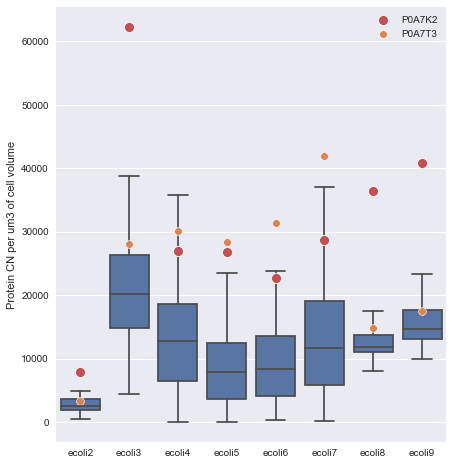

In [157]:
plt.figure(figsize=(7,8))
plt.ylabel('Protein CN per um3 of cell volume')
plt.xticks(range(0,8), [f'ecoli{i}' for i in range(2,10)])
plt.legend()
seaborn.boxplot(data=ribo_quants, color=seaborn.color_palette('deep')[0], fliersize=0)
#seaborn.stripplot(data=ribo_quants, color=seaborn.color_palette('deep')[2],zorder=1)
seaborn.scatterplot(x=range(0,8), y=p0a7k2, s=100, color=seaborn.color_palette('deep')[3],zorder=2,label='P0A7K2')
seaborn.scatterplot(x=range(0,8), y=p0a7t3, s=60, color=seaborn.color_palette('deep')[1],zorder=2,label='P0A7T3')
plt.xticks(range(0,8), [f'ecoli{i}' for i in range(2,10)]);
plt.legend()
plt.savefig('../graphs/ecoli_ribo_dist3.png', dpi=300)

In [88]:
seaborn.color_palette()[0]

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

In [213]:
ecoli_comb_n = ecoli_comb.copy()

In [185]:
for col in ecoli_comb_n.columns[-4:]:
    ecoli_comb_n[col] *= 10000 / float(ecoli_comb_n[ecoli_comb_n['Entry'] == 'P0A7K2'][col]) #Adjust from 

In [164]:
20000 * float(ecoli_comb_n[ecoli_comb_n['Entry'] == 'P0A7K2']['ecoli2'])

157997537.52312192

In [175]:
ecoli_comb_n

,Entry,Status,Protein names,Gene names,Organism,Length,Mass,Gene names (ordered locus ),Entry name,Ribosomal,ecoli2,ecoli3,ecoli4,ecoli5,ecoli6,ecoli7,ecoli8,ecoli9
0,A0A4S5AYA5,unreviewed,Zn(II)/Cd(II)/Pb(II) translocating P-type ATPa...,zntA FAZ83_10695,Escherichia coli (strain K12),732,76718.0,0,A0A4S5AYA5_ECOLI,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A0A6D2Y886,unreviewed,Zn-dependent oxidoreductase,FAZ83_03425,Escherichia coli (strain K12),339,36534.0,0,A0A6D2Y886_ECOLI,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A0A4S5ATF1,unreviewed,Zn(2+)-responsive transcriptional regulator,zntR FAZ83_23180,Escherichia coli (strain K12),141,16195.0,0,A0A4S5ATF1_ECOLI,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,P37617,reviewed,Zinc/cadmium/lead-transporting P-type ATPase (...,zntA yhhO b3469 JW3434,Escherichia coli (strain K12),732,76840.0,b3469 JW3434,ZNTA_ECOLI,False,53.398827,211.527328,54.098845,4.502920,7.208721,5.354526,6.536442,6.411597
4,P33030,reviewed,Zinc-binding GTPase YeiR (EC 3.6.-.-),yeiR b2173 JW2161,Escherichia coli (strain K12),328,36113.0,b2173 JW2161,YEIR_ECOLI,False,11.887208,0.000000,64.836666,21.203286,44.153913,58.410488,57.686290,55.489133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,P76078,reviewed,"1,2-phenylacetyl-CoA epoxidase, subunit B (1,2...",paaB ynbF b1389 JW1384,Escherichia coli (strain K12),95,10942.0,b1389 JW1384,PAAB_ECOLI,False,0.000000,0.000000,0.000000,0.009581,0.005139,0.107216,0.000000,0.000000
9477,P76077,reviewed,"1,2-phenylacetyl-CoA epoxidase, subunit A (EC ...",paaA ydbO b1388 JW1383,Escherichia coli (strain K12),309,35499.0,b1388 JW1383,PAAA_ECOLI,False,0.000000,0.000000,0.000000,0.000000,0.002334,0.005796,0.000000,0.000000
9478,P77467,reviewed,"1,2-epoxyphenylacetyl-CoA isomerase (EC 5.3.3.18)",paaG ydbT b1394 JW1389,Escherichia coli (strain K12),262,28405.0,b1394 JW1389,PAAG_ECOLI,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9479,A0A6D2XEG8,unreviewed,10 kDa chaperonin (GroES protein) (Protein Cpn10),groES groS FAZ83_09765,Escherichia coli (strain K12),97,10387.0,0,A0A6D2XEG8_ECOLI,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [186]:
cn_per_vol_n = []
for i in range(2,10):
    cn_per_vol_n.append(sum(ecoli_comb_n[f'ecoli{i}']))

In [187]:
cn_per_vol_n

[2909253.8087697863,
 2525615.033208994,
 7247738.214305825,
 3286643.2307600807,
 3744371.3836626243,
 3498297.4072013884,
 3442002.8757577254,
 2998150.9252547873]

In [188]:
cn_per_vol_n.pop(2)

7247738.214305825

In [473]:
max(ecoli_comb[ecoli_comb['Ribosomal'] == True]['ecoli8'])

36363.12063757624

In [195]:
def milo(Cp: float, Mavg: float):
    return 6*(10**11) * Cp / Mavg

In [196]:
cn_per_vol_m = []
for i in [3,4,5,8]:
    cn_per_vol_m.append(milo(0.135, sum(ecoli_comb2[f'ecoli{i}']*ecoli_comb2['Mass'])/sum(ecoli_comb2[f'ecoli{i}'])))

In [183]:
cn_per_vol_m

[2781981.263749312,
 2861835.4046623837,
 2471997.283824876,
 2799856.871568591,
 2827827.386453727,
 2821395.518911554,
 3118039.904481532,
 3052517.1627637087]

In [197]:
cn_per_vol_m

[2861835.4046623837, 2471997.2838248755, 2799856.871568594, 3118039.904481532]

In [199]:
for i in [3,4,5,8]:
    print(sum(ecoli_comb2[f'ecoli{i}']*ecoli_comb2['Mass'])/sum(ecoli_comb2[f'ecoli{i}']))

28303.514544560512
32767.02629489552
28930.050254540507
25977.858680890964


In [478]:
import matplotlib.pyplot as plt

In [498]:
import numpy

In [523]:
plt.style.use('seaborn')

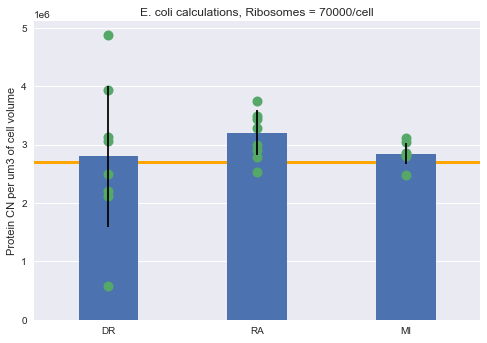

In [196]:
plt.grid(False, axis='x')
plt.plot([0,6],[2700000,2700000], color='orange',zorder=1, linewidth=3)
plt.xlim([0,6])
plt.title('E. coli calculations, Ribosomes = 70000/cell')
plt.bar(x=[1,3,5], height=[numpy.mean(x) for x in [cn_per_vol, cn_per_vol_n, cn_per_vol_m]], zorder=2)
plt.errorbar(x=1, y=numpy.mean(cn_per_vol), yerr = numpy.std(cn_per_vol), color='black', zorder=4)
plt.errorbar(x=3, y=numpy.mean(cn_per_vol_n), yerr = numpy.std(cn_per_vol_n), color='black', zorder=4)
plt.errorbar(x=5, y=numpy.mean(cn_per_vol_m), yerr = numpy.std(cn_per_vol_m), color='black', zorder=4)
plt.xticks([1,3,5], ['DR', 'RA', 'MI'])
plt.ylabel('Protein CN per um3 of cell volume')
plt.scatter(x=[*[1]*8,*[3]*8,*[5]*7], y=[*cn_per_vol, *cn_per_vol_n, *cn_per_vol_m], linewidth=3,zorder=3)
plt.savefig('ecoli_final_calc2.png', dpi=300)

<AxesSubplot:>

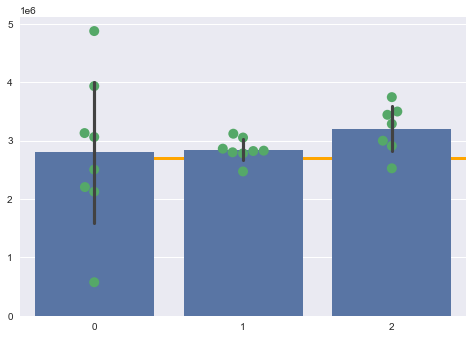

In [204]:
plt.plot([0,6],[2700000,2700000], color='orange',zorder=1, linewidth=3)
plt.xlim([0,6])
seaborn.barplot(data=[cn_per_vol, cn_per_vol_m, cn_per_vol_n], color=seaborn.color_palette('deep')[0], ci="sd", dodge=False)
seaborn.swarmplot(data=[cn_per_vol, cn_per_vol_m, cn_per_vol_n], color=seaborn.color_palette('deep')[2], s=10,zorder=1)

In [12]:
protein_quants = []
for i in range(2,10):
    protein_quants.append(ecoli_comb[ecoli_comb[f'ecoli{i}'] != 0].set_index('Entry')[f'ecoli{i}'])

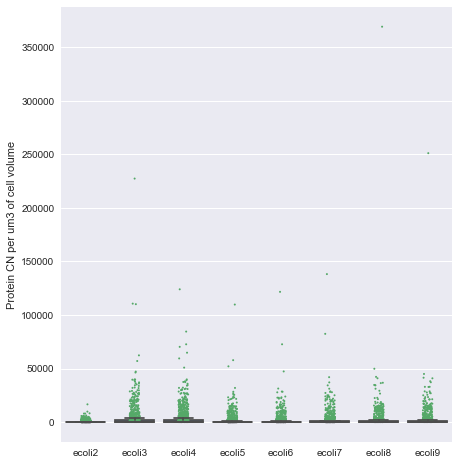

In [18]:
plt.figure(figsize=(7,8))
plt.ylabel('Protein CN per um3 of cell volume')
plt.xticks(range(0,8), [f'ecoli{i}' for i in range(2,10)])
seaborn.boxplot(data=protein_quants, color=seaborn.color_palette('deep')[0], fliersize=0)
seaborn.stripplot(data=protein_quants, color=seaborn.color_palette('deep')[2], s=2, zorder=1)
plt.xticks(range(0,8), [f'ecoli{i}' for i in range(2,10)]);
#plt.savefig('../graphs/ecoli_ribo_dist3.png', dpi=300)

In [5]:
ecoli_comb = pandas.read_excel('../data/ecoli/ecoli_comb_final.xlsx')

In [51]:
ecoli_comb.head()

,Entry,Status,Protein names,Gene names,Organism,Length,Mass,Gene names (ordered locus ),Entry name,Ribosomal,ecoli1,ecoli2,ecoli3,ecoli4
0,A0A4S5AYA5,unreviewed,Zn(II)/Cd(II)/Pb(II) translocating P-type ATPa...,zntA FAZ83_10695,Escherichia coli (strain K12),732,76718,0,A0A4S5AYA5_ECOLI,False,0.000000,0.000000,0.000000,0.00000
1,A0A6D2Y886,unreviewed,Zn-dependent oxidoreductase,FAZ83_03425,Escherichia coli (strain K12),339,36534,0,A0A6D2Y886_ECOLI,False,0.000000,0.000000,0.000000,0.00000
2,A0A4S5ATF1,unreviewed,Zn(2+)-responsive transcriptional regulator,zntR FAZ83_23180,Escherichia coli (strain K12),141,16195,0,A0A4S5ATF1_ECOLI,False,0.000000,0.000000,0.000000,0.00000
3,P37617,reviewed,Zinc/cadmium/lead-transporting P-type ATPase (...,zntA yhhO b3469 JW3434,Escherichia coli (strain K12),732,76840,b3469 JW3434,ZNTA_ECOLI,False,549.064575,60.660344,5.033681,9.90356
4,P33030,reviewed,Zinc-binding GTPase YeiR (EC 3.6.-.-),yeiR b2173 JW2161,Escherichia coli (strain K12),328,36113,b2173 JW2161,YEIR_ECOLI,False,0.000000,72.700525,23.702528,87.40223


In [52]:
ecoli_comb2 = ecoli_comb.set_index('Entry', drop = True)

In [53]:
quant_prots = [ecoli_comb2[ecoli_comb2[f'ecoli{i}'] != 0.0].sort_values(by=f'ecoli{i}', ascending = False).index.tolist() for i in range(1,5)]

In [54]:
[len(i) for i in quant_prots]

[1217, 1913, 2349, 2075]

In [56]:
cn_per_vol = []
for i in range(1,5):
    cn_per_vol.append(sum(ecoli_comb[f'ecoli{i}']))
    
cn_per_vol

[3933465.5056633493, 4876077.751756361, 2204424.924984279, 3129049.1451515593]

In [10]:
cn_per_vol_m = []
for i in range(1,5):
    cn_per_vol_m.append(milo(0.135, sum(ecoli_comb[f'ecoli{i}']*ecoli_comb['Mass'])/sum(ecoli_comb[f'ecoli{i}'])))
    
cn_per_vol_m

[2861835.4046623837,
 2471997.2838248764,
 2799856.8715685913,
 3118039.9044815325]

In [34]:
m_avg = []
for i in range(1,5):
    m_avg.append(sum(ecoli_comb[f'ecoli{i}']*ecoli_comb['Mass'])/sum(ecoli_comb[f'ecoli{i}']))

m_avg

[28303.514544560512, 32767.02629489551, 28930.050254540536, 25977.85868089096]

In [12]:
for i in range(1,5):
    print(sum(ecoli_comb[f'ecoli{i}']*ecoli_comb['Mass'])/602200000000)

0.1848736269512947
0.2653181134303481
0.10590189947219686
0.1349817278284787


In [13]:
ecoli_comb_r = ecoli_comb[ecoli_comb['Ribosomal']]

In [14]:
ecoli_comb_r[ecoli_comb_r['Entry'] == 'P0A7K2']

,Entry,Status,Protein names,Gene names,Organism,Length,Mass,Gene names (ordered locus ),Entry name,Ribosomal,ecoli1,ecoli2,ecoli3,ecoli4
9114,P0A7K2,reviewed,50S ribosomal protein L7/L12 (L8) (Large ribos...,rplL b3986 JW3949,Escherichia coli (strain K12),121,12295,b3986 JW3949,RL7_ECOLI,True,62297.150657,26910.893344,26828.892219,36363.120638


In [15]:
ecoli_comb_r.drop(9114, inplace=True)

C:\Users\Dynev\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
ribo_quants = []
for i in range(1,5):
    ribo_quants.append(ecoli_comb_r[ecoli_comb_r[f'ecoli{i}'] != 0].set_index('Entry')[f'ecoli{i}'])

In [44]:
p0a7k2 = ecoli_comb_r.set_index('Entry').loc['P0A7K2'].loc['ecoli1':]

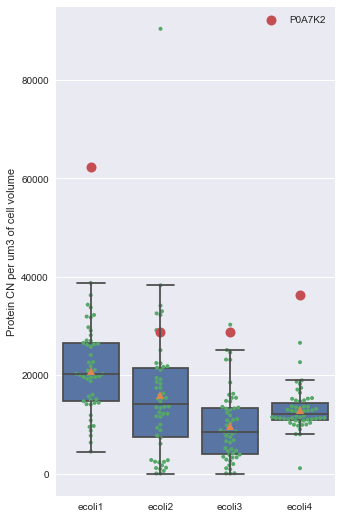

In [212]:
plt.figure(figsize=(5,9))
plt.ylabel('Protein CN per um3 of cell volume')
seaborn.boxplot(data=ribo_quants, color=seaborn.color_palette('deep')[0], fliersize=0, showmeans = True, meanprops={'markerfacecolor':seaborn.color_palette('deep')[1],
                                                                                                                    'markeredgecolor':seaborn.color_palette('deep')[1],
                                                                                                                   'markersize':8})
seaborn.swarmplot(data=ribo_quants, color=seaborn.color_palette('deep')[2], s=4, zorder=1)
seaborn.scatterplot(x=range(0,4), y=p0a7k2, s=100, color=seaborn.color_palette('deep')[3],zorder=2,linewidth=0,label='P0A7K2')
plt.xticks(range(0,4), [f'ecoli{i}' for i in range(1,5)])
plt.legend()
plt.savefig('../graphs/ecoli_ribo_final_2.png', dpi=300, bbox_inches='tight')

In [221]:
cn_per_vol_n1 = []
for i in [3,4,5,8]:
    cn_per_vol_n1.append(sum(ecoli_comb2[f'ecoli{i}'] * 10000/max(ecoli_comb_r[f'ecoli{i}'])))

In [222]:
cn_per_vol_n2 = []
for i in [3,8]:
    cn_per_vol_n2.append(sum(ecoli_comb2[f'ecoli{i}'] * 40000/float(ecoli_comb2[ecoli_comb2['Entry'] == 'P0A7K2'][f'ecoli{i}'])))

In [223]:
cn_per_vol_n3 = []
for i in range(4):
    cn_per_vol_n3.append(sum(ecoli_comb2.iloc[:,-4+i] * 10000/numpy.mean(ribo_quants[i])))

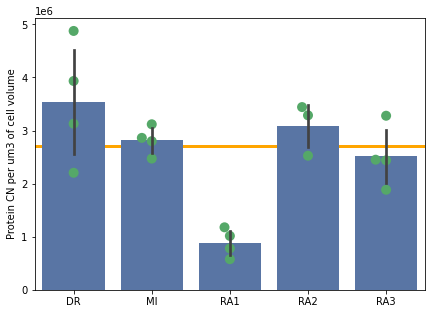

In [20]:
plt.figure(figsize=(7,5))
plt.plot([-1,5],[2700000,2700000], color='orange',zorder=1, linewidth=3)
plt.xlim([0,5])
plt.ylabel('Protein CN per um3 of cell volume')
seaborn.barplot(data=[cn_per_vol, cn_per_vol_m, cn_per_vol_n1, cn_per_vol_n2, cn_per_vol_n3], color=seaborn.color_palette('deep')[0], ci="sd", dodge=False,edgecolor="none")
seaborn.swarmplot(data=[cn_per_vol, cn_per_vol_m, cn_per_vol_n1, cn_per_vol_n2, cn_per_vol_n3], color=seaborn.color_palette('deep')[2], s=10,zorder=1)
plt.xticks(range(0,5), ['DR', 'MI', 'RA1', 'RA2', 'RA3'])
plt.savefig('../graphs/ecoli_final_scenarios.png', dpi=300, bbox_inches='tight')

In [224]:
cn_per_vol_n1

[1015186.9173124518, 576927.1104909215, 779048.0634909043, 1177163.8880886945]

In [225]:
cn_per_vol_n2

[2525615.0332089937, 3442002.8757577254]

In [226]:
cn_per_vol_n3

[1884252.9227320545, 3278757.422761635, 2450646.3494172236, 2439219.076318517]

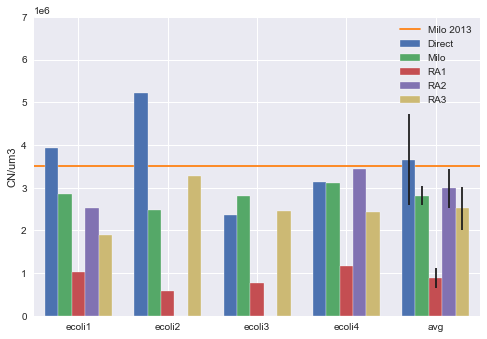

In [257]:
#Final graph
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(5)
y1 = [3933465.5056633493, 5216269.222809126, 2358222.0127738835, 3129049.145151559]
y2 = [2861835.4046623837, 2471997.2838248755, 2799856.871568594, 3118039.904481532]
y3 = [1015186.9173124518, 576927.1104909215, 779048.0634909043, 1177163.8880886945]
y4 = [2525615.0332089937, 0, 0, 3442002.8757577254]
y5 = [1884252.9227320545, 3278757.422761635, 2450646.3494172236, 2439219.076318517]
y_mean = [numpy.mean(y1),numpy.mean(y2),numpy.mean(y3),numpy.mean([2525615.0332089937,  3442002.8757577254]),numpy.mean(y5)]
y_err = [numpy.std(y1), numpy.std(y2), numpy.std(y3), numpy.std([2525615.0332089937,  3442002.8757577254]), numpy.std(y5)]
y1.append(numpy.mean(y1))
y2.append(numpy.mean(y2))
y3.append(numpy.mean(y3))
y4.append(numpy.mean([2525615.0332089937,  3442002.8757577254]))
y5.append(numpy.mean(y5))
width = 0.15
plt.xlim([-0.5,4.5])
plt.ylim([0,7000000])
# plot data in grouped manner of bar type
plt.plot([-1,5], [3500000, 3500000], color='tab:orange', zorder=1)
plt.bar(x-0.3, y1, width, zorder=2)
plt.bar(x-0.15, y2, width, zorder=2)
plt.bar(x, y3, width, zorder=2)
plt.bar(x+0.15, y4, width, zorder=2)
plt.bar(x+0.3, y5, width, zorder=2)
plt.errorbar([3.7,3.85,4,4.15,4.3], y_mean, y_err, fmt=' ', color='k', zorder=3)
plt.xticks(x, ['ecoli1', 'ecoli2', 'ecoli3', 'ecoli4', 'avg'])
plt.ylabel("CN/um3")
plt.legend(["Milo 2013", "Direct", "Milo", "RA1", "RA2", "RA3"])
plt.savefig('../graphs/ecoli_final_comp.png', bbox_inches='tight', dpi=300)

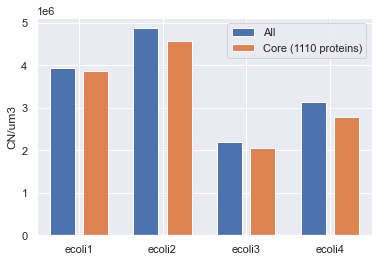

In [33]:
width = 0.3
x = numpy.arange(4)
plt.xlim([-0.5,3.5])
plt.bar(x-0.2, cn_per_vol, width)
plt.bar(x+0.2, cn_per_vol2, width)
plt.xticks(x, ['ecoli1', 'ecoli2', 'ecoli3', 'ecoli4'])
plt.ylabel("CN/um3")
plt.legend(["All", "Core (1110 proteins)"])
plt.savefig('../graphs/ecoli_cn_core.png', dpi=300)